In [7]:
# !pip install seaborn --upgrade
# import seaborn as sns
# sns.__version__

Import CSV!


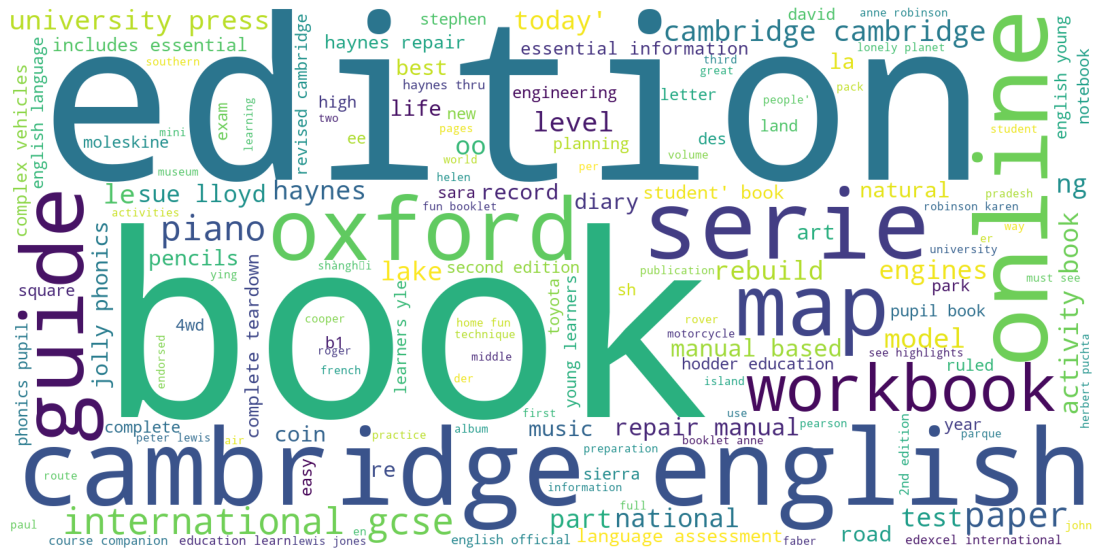

In [8]:
from __future__ import print_function
import os
import pandas as pd
import numpy as np
from sklearn.model_selection import StratifiedShuffleSplit, GridSearchCV
from sklearn import svm
from sklearn.svm import LinearSVC
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import MinMaxScaler
from sklearn.datasets import make_classification
from sklearn import preprocessing
import matplotlib.pyplot as plt
import random
from wordcloud import WordCloud
import re
import zipfile
import shutil
from wordcloud import STOPWORDS

#read the full parse dataset
json_path = '../input/full-parse-json/full_parse_results.json'

print("Import CSV!")
df = pd.read_json(json_path)

#filter lower bound
#Remove all extra newlines and all double spaces 
df = df[df['average_rating'] <= 2.5]
df = df['vision_text']
df.dropna(inplace=True)
df = df.map(lambda x: x.replace('\n', ' ').replace('\r', '').replace(' +', ' ').lower())
df = df.map(lambda x: re.sub(r"\b[a-zA-Z]\b", "", x))

#generate wordcloud of 150 words, removing some extra stopwords
wordcloud = WordCloud(max_words = 150,stopwords=['de', 'rd'] + list(STOPWORDS), collocations=True, background_color="white",width=1600, height=800).generate(' '.join(df))
plt.figure( figsize=(20,10))
plt.imshow(wordcloud)
plt.axis("off")

plt.show()
 #save svg
wordcloud_svg = wordcloud.to_svg(embed_font=True)
f = open("wordcloud_lower.svg","w+")
f.write(wordcloud_svg )
f.close()

22080
0        copyrighted material #1 new york times bestsel...
1        "both poetry and medicine ... absolutely brill...
2        loren cordain, ph.. author of the bestselling ...
3        the number one bestseller yuval noah harari ho...
4        new scientific concepts to improve your thinki...
                               ...                        
22347    second edition explicit direct instruction the...
22348    art therapy exercises inspirational and practi...
22349    anniesloan paints everything step-by-step proj...
22350    17 godaa and  letters to my son write now. rea...
22353    sitting still like  frog mindfulness exercises...
Name: vision_text, Length: 18159, dtype: object


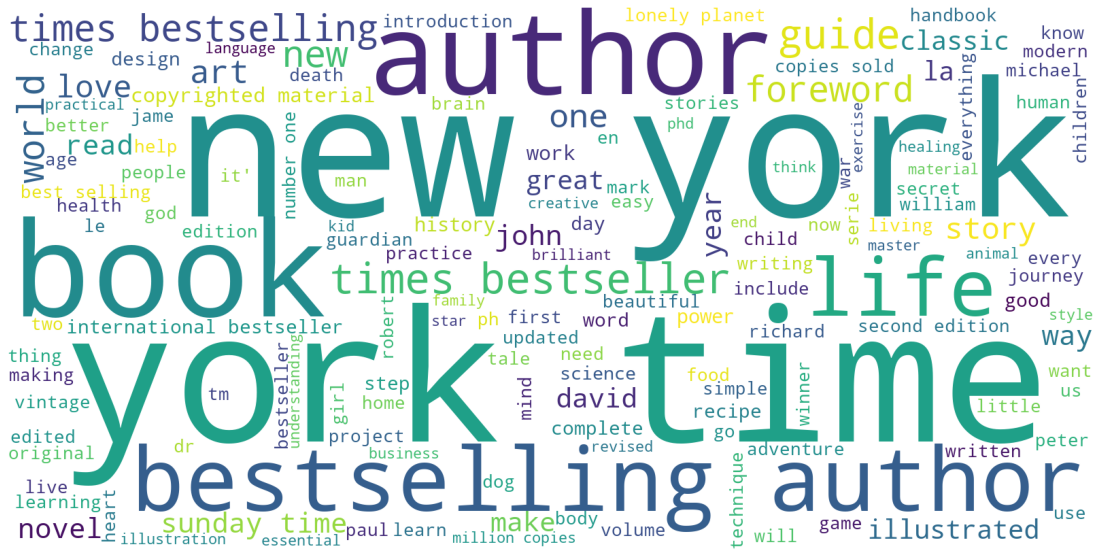

In [9]:
#Generate upper bound
df = pd.read_json(json_path)
df = df[df['average_rating'] > 2.5]
print(len(df))
df = df['vision_text']
df.dropna(inplace=True)
df = df.map(lambda x: x.replace('\n', ' ').replace('\r', '').replace(' +', ' ').lower())
df = df.map(lambda x: re.sub(r"\b[a-zA-Z]\b", "", x))
print(df)
wordcloud = WordCloud(max_words = 150, stopwords=['de', 'rd'] + list(STOPWORDS), collocations=True, background_color="white",width=1600, height=800).generate(' '.join(df))
plt.figure( figsize=(20,10))
plt.imshow(wordcloud)
plt.axis("off")

plt.show()

wordcloud_svg = wordcloud.to_svg(embed_font=True)
f = open("wordcloud_higher.svg","w+")
f.write(wordcloud_svg )
f.close()

In [10]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from mpl_toolkits.mplot3d import Axes3D

#generate 3d plot
print("Import CSV!")
df_colors = pd.read_json("../input/colors/colors.json")
df_books = pd.read_json(json_path)

#merge colors with book data and extract RGB and pixel fraction
df = pd.merge(df_colors, df_books, how='inner', on='isbn')

df = df[['red', 'green', 'blue','pixel_fraction', 'average_rating']]

print("Done")

Import CSV!
Done


FileNotFoundError: [Errno 2] No such file or directory: 'pics/test_190.png'

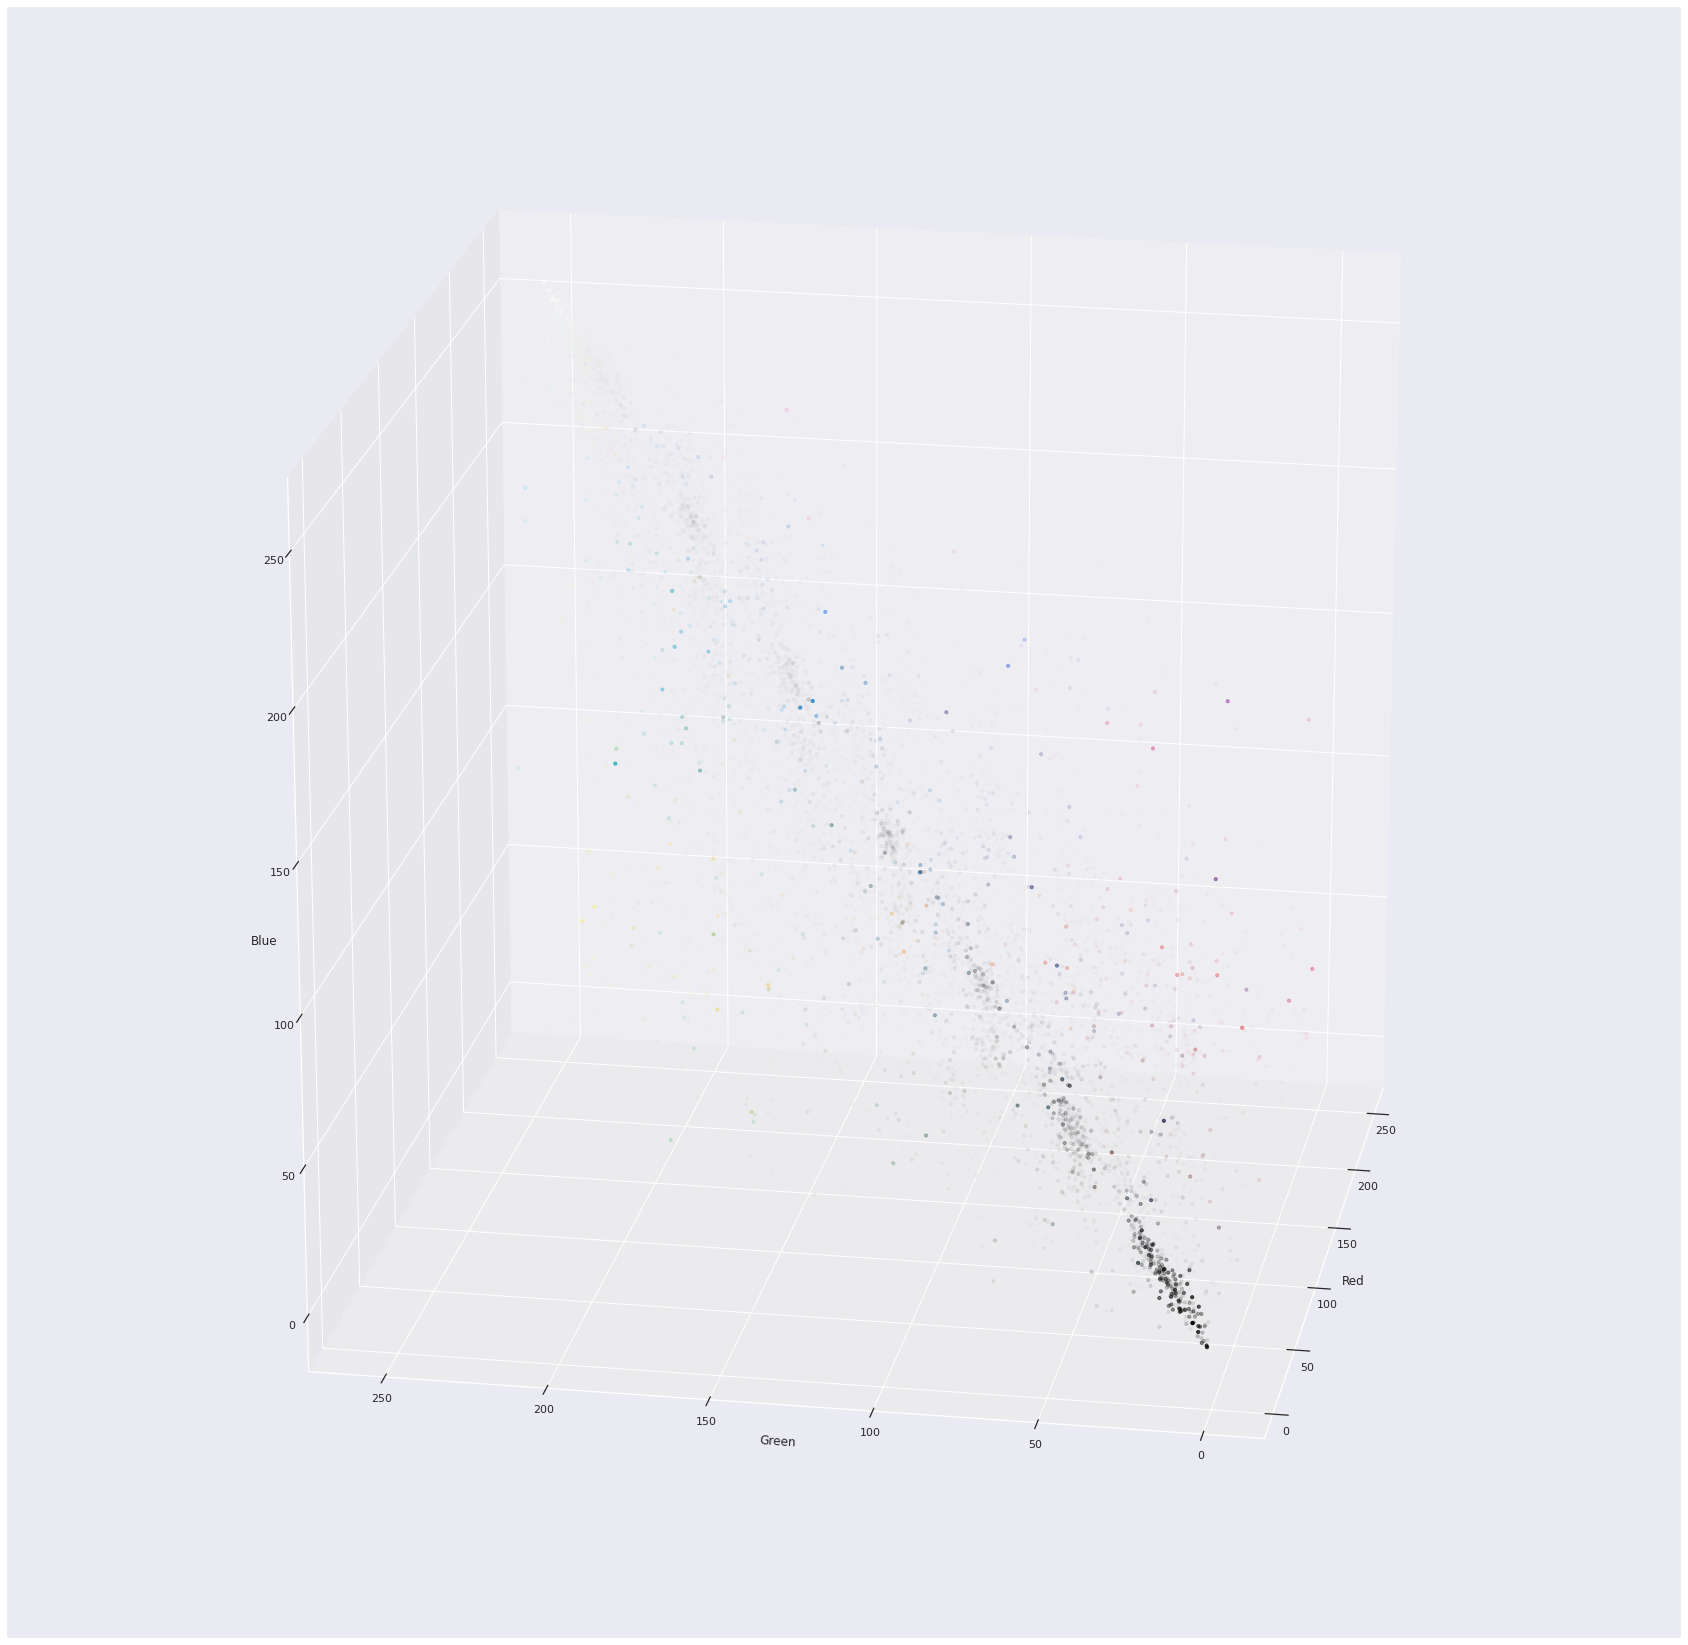

In [14]:
#rotation
def zipdir(path, ziph):
    # ziph is zipfile handle
    for root, dirs, files in os.walk(path):
        for file in files:
            ziph.write(os.path.join(root, file), os.path.relpath(os.path.join(root, file), os.path.join(path, '..')))
            

#Generate plot at 190 and 250 degrees
#Make list comprehension of RGB values and add alpha 
df = df.sample(9000)
for rot in [190, 250]:
    colors = [[row['red']/256,row['green']/256,row['blue']/256] for index, row in df.iterrows()]
    sns.set(style = "darkgrid")
    fig = plt.figure( figsize=(30,30))
    ax = fig.add_subplot(111, projection = '3d')

    ax.set_xlabel("Red")
    ax.set_ylabel("Green")
    ax.set_zlabel("Blue")
    ax.scatter(df['red'], df['green'], df['blue'], facecolors=colors, s=10)

    ax.view_init(20, rot)
    plt.savefig(f'pics/test_{rot}.png', format='png')
    print(f"finished {rot}")
    print(f"Points: {len(subset)}")

    zipf = zipfile.ZipFile(f'scatter.zip', 'w', zipfile.ZIP_DEFLATED)
    zipdir('pics/', zipf)
    zipf.close()